# Accessing ICESat-2 Data
NOTICE: this notebook is experimental/draft to explore what deprecating ipx.Query might look
like and adoping earthaccess directly instead.


This notebook ({nb-download}`download <IS2_data_access_earthaccess.ipynb>`) illustrates the use of icepyx for programmatic ICESat-2 data query and download from the NASA NSIDC DAAC (NASA National Snow and Ice Data Center Distributed Active Archive Center).
A complimentary notebook demonstrates in greater detail the [subsetting](https://icepyx.readthedocs.io/en/latest/example_notebooks/IS2_data_access2-subsetting.html) options available when ordering data.

Import packages, including icepyx

/var/folders/_y/zvjp79k53rdgpcpq4bnrmnqr0000gn/T/ipykernel_15579/4281596969.py:2: FutureWarning: icepyx v1.x is being deprecated; the back-end systems on which it relies
will be shut down as of late 2024. At that time, upgrade to icepyx v2.x, which uses the
new NASA Harmony back-end, will be required. Please see
<https://icepyx.readthedocs.io/en/latest/user_guide/changelog/v1.3.0.html> for more
information!

  import icepyx as ipx


<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
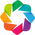

In [1]:
import earthaccess as ea
import icepyx as ipx
import os
import shutil
%matplotlib inline

---------------------------------

## Quick-Start Guide

The entire process of getting ICESat-2 data (from query to download) can ultimately be accomplished in two minimal lines of code:

`region_a = ipx.Query(short_name, spatial_extent, date_range)`

`region_a.download_granules(path)`

where the function inputs are described in more detail below.

**The rest of this notebook explains the required inputs used above, optional inputs not available in the minimal example, and the other data search and visualization tools built in to icepyx that make it easier for the user to find, explore, and download ICESat-2 data programmatically from NSIDC.** The detailed steps outlined and the methods showcased below are meant to give the user more control over the data they find and download (including options to order/download only the relevant portions of a data granule), some of which are called using default values behind the scenes if the user simply skips to the `download_granules` step.

## Key Steps for Programmatic Data Access

There are several key steps for accessing data from the NSIDC API:
1. Define your parameters (spatial, temporal, dataset, etc.)
2. Query the NSIDC API to find out more information about the dataset
4. Define additional parameters (e.g. subsetting/customization options)
5. Order your data
6. Download your data

icepyx streamlines this process into a minimal number of lines of code.

### Create an ICESat-2 data object with the desired search parameters

There are three required inputs, depending on how you want to search for data. Two are required in all cases:
- `short_name` = the data product of interest, known as its "short name".
See https://nsidc.org/data/icesat-2/products for a list of the available data products.
- `spatial extent` = a region of interest to search within. This can be entered as a bounding box, polygon vertex coordinate pairs, or a polygon geospatial file (currently shp, kml, and gpkg are supported).
    - bounding box: Given in decimal degrees for the lower left longitude, lower left latitude, upper right longitude, and upper right latitude
    - polygon vertices: Given as longitude, latitude coordinate pairs of decimal degrees with the last entry a repeat of the first.
    - polygon file: A string containing the full file path and name.
    
*NOTE: The input keyword for `short_name` was updated in the code from `dataset` to `product` to match common usage.
This should not affect users providing positional inputs as demonstrated in this tutorial.*

*NOTE: You can submit at most one bounding box or a list of lonlat polygon coordinates per object instance.
Per NSIDC requirements, geospatial polygon files may only contain one feature (polygon).*

Then, for all non-gridded products (ATL<=13), you must include AT LEAST one of the following inputs (temporal or orbital constraints):
- `date_range` = the date range for which you would like to search for results. The following formats are accepted: 
    - A list of two 'YYYY-MM-DD' strings separated by a comma
    - A list of two 'YYYY-DOY' strings separated by a comma
    - A list of two datetime.date or datetime.datetime objects
    - Dict with the following keys:
        - `start_date`: start date, type can be datetime.datetime, datetime.date, or strings (format 'YYYY-MM-DD' or 'YYYY-DOY')
        - `end_date`: end date, type can be datetime.datetime, datetime.date, or strings (format 'YYYY-MM-DD' or 'YYYY-DOY')
- `cycles` = Which orbital cycle to use, input as a numerical string or a list of strings. If no input is given, this value defaults to all available cycles within the search parameters.  An orbital cycle refers to the 91-day repeat period of the ICESat-2 orbit.
- `tracks` = Which [Reference Ground Track (RGT)](https://icesat-2.gsfc.nasa.gov/science/specs) to use, input as a numerical string or a list of strings. If no input is given, this value defaults to all available RGTs within the spatial and temporal search parameters.

Below are examples of each type of spatial extent and temporal input and an example using orbital parameters. Please choose and run only one of the input option cells to set your spatial and temporal parameters.

In [2]:
# bounding box
short_name = 'ATL06'
spatial_extent = [-55, 68, -48, 71]
date_range = ['2019-02-20','2019-02-28']

In [ ]:
# polygon vertices (here equivalent to the bounding box, above)
short_name = 'ATL06'
spatial_extent = [(-55, 68), (-55, 71), (-48, 71), (-48, 68), (-55, 68)]
date_range = ['2019-02-20','2019-02-28']

In [ ]:
# bounding box with 'YYYY-DOY' date range (equivalent to 'YYYY-MM-DD' date ranges above)
short_name = 'ATL06'
spatial_extent = [-55, 68, -48, 71]
date_range = ['2019-051','2019-059']

In [ ]:
# polygon vertices with datetime.datetime date ranges
import datetime as dt

start_dt = dt.datetime(2019, 2, 20, 0, 10, 0)
end_dt = dt.datetime(2019, 2, 28, 14, 45, 30)
short_name = 'ATL06'
spatial_extent = [(-55, 68), (-55, 71), (-48, 71), (-48, 68), (-55, 68)]
date_range = [start_dt, end_dt]

In [ ]:
# bounding box with dict containing date ranges
short_name = 'ATL06'
spatial_extent = [-55, 68, -48, 71]
date_range = {"start_date": start_dt, "end_date": '2019-02-28'}

In [ ]:
# polygon geospatial file (metadata match but no subset match)
# short_name = 'ATL06'
# spatial_extent = './supporting_files/data-access_PineIsland/glims_polygons.kml'
# date_range = ['2019-02-22','2019-02-28']

# #polygon geospatial file (subset and metadata match)
# short_name = 'ATL06'
# spatial_extent = './supporting_files/data-access_PineIsland/glims_polygons.shp'
# date_range = ['2019-10-01','2019-10-05']

#polygon geospatial file (same area as other examples; subset and metadata match)
short_name = 'ATL06'
spatial_extent = './supporting_files/simple_test_poly.gpkg'
date_range = ['2019-10-01','2019-10-05']

Create the data object using our inputs

In [ ]:
region_a = ipx.Query(short_name, spatial_extent, date_range)

In [15]:
reg = ea.search_data(
    short_name = short_name,
    # version = "005",
    # cloud_hosted = True,
    bounding_box = tuple(spatial_extent),
    temporal = tuple(date_range),
    # count = 100
)

In [33]:
len(reg)

8

In [17]:
type(reg[0])

earthaccess.results.DataGranule

In [85]:
regcol = ea.search_datasets(
    short_name = short_name,
    version = "006",
    # cloud_hosted = True,
    bounding_box = tuple(spatial_extent),
    temporal = tuple(date_range),
    # count = 100
)

In [86]:
len(regcol)

2

In [87]:
type(regcol[0])

earthaccess.results.DataCollection

In [88]:
regcol[0].concept_id()

'C2564427300-NSIDC_ECS'

In [89]:
regcol[1].concept_id()

'C2670138092-NSIDC_CPRD'

In [53]:
query = ea.granule_query().parameters(short_name = short_name,
    # version = "005",
    # cloud_hosted = True,
    bounding_box = tuple(spatial_extent),
    temporal = tuple(date_range),
    # count = 100
)

In [54]:
type(query)

earthaccess.search.DataGranules

In [71]:
gresults=query.get()

In [72]:
len(gresults)

8

In [77]:
gresults[0].size()

60.356141090393066

In [79]:
gresults

[Collection: {'EntryTitle': 'ATLAS/ICESat-2 L3A Land Ice Height V006'}
 Spatial coverage: {'HorizontalSpatialDomain': {'Geometry': {'GPolygons': [{'Boundary': {'Points': [{'Longitude': -56.81026, 'Latitude': 80.0474}, {'Longitude': -57.44304, 'Latitude': 80.02336}, {'Longitude': -56.88716, 'Latitude': 79.5751}, {'Longitude': -56.41671, 'Latitude': 79.16552}, {'Longitude': -55.97803, 'Latitude': 78.75537}, {'Longitude': -55.56833, 'Latitude': 78.34465}, {'Longitude': -55.18714, 'Latitude': 77.93682}, {'Longitude': -54.82829, 'Latitude': 77.52765}, {'Longitude': -54.49175, 'Latitude': 77.12016}, {'Longitude': -53.62762, 'Latitude': 75.95387}, {'Longitude': -53.36345, 'Latitude': 75.55885}, {'Longitude': -53.11744, 'Latitude': 75.17242}, {'Longitude': -52.87357, 'Latitude': 74.77125}, {'Longitude': -52.63342, 'Latitude': 74.35727}, {'Longitude': -52.40349, 'Latitude': 73.94315}, {'Longitude': -52.18409, 'Latitude': 73.52871}, {'Longitude': -51.57788, 'Latitude': 72.28456}, {'Longitude': -

In [60]:
colquery = ea.collection_query().parameters(short_name = short_name,
    # version = "005",
    # cloud_hosted = True,
    bounding_box = tuple(spatial_extent),
    temporal = tuple(date_range),
    # count = 100
                                           )

In [64]:
results=colquery.get()

In [90]:
results[1].concept_id()

'C2670138092-NSIDC_CPRD'

In [69]:
results[0].summary()

{'short-name': 'ATL06',
 'concept-id': 'C2564427300-NSIDC_ECS',
 'version': '006',
 'file-type': "[{'FormatType': 'Native', 'Format': 'HDF5', 'FormatDescription': 'HTTPS'}]",
 'get-data': ['https://n5eil01u.ecs.nsidc.org/ATLAS/ATL06.006/',
  'https://search.earthdata.nasa.gov/search?q=ATL06+V006',
  'https://openaltimetry.org/',
  'https://nsidc.org/data/data-access-tool/ATL06/versions/6/']}

In [95]:
results[1].summary()

{'short-name': 'ATL06',
 'concept-id': 'C2670138092-NSIDC_CPRD',
 'version': '006',
 'file-type': "[{'FormatType': 'Native', 'Format': 'HDF5', 'FormatDescription': 'HTTPS'}]",
 'get-data': ['https://search.earthdata.nasa.gov/search?q=ATL06+V006',
  'https://cmr.earthdata.nasa.gov/virtual-directory/collections/C2670138092-NSIDC_CPRD'],
 'cloud-info': {'Region': 'us-west-2',
  'S3BucketAndObjectPrefixNames': ['nsidc-cumulus-prod-protected/ATLAS/ATL06/006',
   'nsidc-cumulus-prod-public/ATLAS/ATL06/006'],
  'S3CredentialsAPIEndpoint': 'https://data.nsidc.earthdatacloud.nasa.gov/s3credentials',
  'S3CredentialsAPIDocumentationURL': 'https://data.nsidc.earthdatacloud.nasa.gov/s3credentialsREADME'}}

In [96]:
len(results[0].services())

2

In [97]:
results[0].services()

{'S1568899363-NSIDC_ECS': [{'meta': {'revision-id': 8,
    'deleted': False,
    'format': 'application/vnd.nasa.cmr.umm+json',
    'provider-id': 'NSIDC_ECS',
    'user-id': 'tdwillia',
    'associations': {'collections': ['C1397496671-NSIDC_ECS',
      'C1584603819-NSIDC_ECS',
      'C1000001782-NSIDC_ECS',
      'C1000001041-NSIDC_ECS',
      'C1537499848-NSIDC_ECS',
      'C2241388692-NSIDC_ECS',
      'C1588274294-NSIDC_ECS',
      'C2136472484-NSIDC_ECS',
      'C189991865-NSIDC_ECS',
      'C50772651-NSIDC_ECS',
      'C1000001227-NSIDC_ECS',
      'C2531308461-NSIDC_ECS',
      'C2556535183-NSIDC_ECS',
      'C1630929878-NSIDC_ECS',
      'C1000000280-NSIDC_ECS',
      'C2257958430-NSIDC_ECS',
      'C2697180532-NSIDC_ECS',
      'C186228757-NSIDC_ECS',
      'C1600442915-NSIDC_ECS',
      'C183614540-NSIDC_ECS',
      'C1992493851-NSIDC_ECS',
      'C187355521-NSIDC_ECS',
      'C2695683578-NSIDC_ECS',
      'C1584603703-NSIDC_ECS',
      'C1539057347-NSIDC_ECS',
      'C50759

In [99]:
results[1].services().keys()

dict_keys(['S2836723123-XYZ_PROV', 'S3107386427-NSIDC_CPRD', 'S3213793274-NSIDC_CPRD', 'S2472217299-NSIDC_CPRD'])

In [91]:
results[1].services()

{'S2836723123-XYZ_PROV': [{'meta': {'revision-id': 6,
    'deleted': False,
    'format': 'application/vnd.nasa.cmr.umm+json',
    'provider-id': 'XYZ_PROV',
    'user-id': 'olittlej',
    'associations': {'collections': ['C2613553216-NSIDC_CPRD',
      'C2613553260-NSIDC_CPRD',
      'C3049900163-ORNL_CLOUD',
      'C2684928243-NSIDC_CPRD',
      'C2142771958-LPCLOUD',
      'C2713030505-NSIDC_CPRD',
      'C2670138092-NSIDC_CPRD',
      'C2237824918-ORNL_CLOUD',
      'C2142749196-LPCLOUD',
      'C2142776747-LPCLOUD',
      'C2649212495-NSIDC_CPRD',
      'C2596864127-NSIDC_CPRD',
      'C2613553327-NSIDC_CPRD']},
    'native-id': 'mmt_service_40306',
    'association-details': {'collections': [{'concept-id': 'C2613553216-NSIDC_CPRD'},
      {'concept-id': 'C2613553260-NSIDC_CPRD'},
      {'concept-id': 'C3049900163-ORNL_CLOUD'},
      {'concept-id': 'C2684928243-NSIDC_CPRD'},
      {'concept-id': 'C2142771958-LPCLOUD'},
      {'concept-id': 'C2713030505-NSIDC_CPRD'},
      {'concep

In [2]:
ea.search_data?

Signature: ea.search_data(count: int = -1, **kwargs: Any) -> List[earthaccess.results.DataGranule]
Docstring:
Search dataset granules using NASA's CMR.

[https://cmr.earthdata.nasa.gov/search/site/docs/search/api.html](https://cmr.earthdata.nasa.gov/search/site/docs/search/api.html)

Parameters:
    count: Number of records to get, -1 = all
    kwargs (Dict):
        arguments to CMR:

        * **short_name**: dataset short name, e.g. ATL08
        * **version**: dataset version
        * **doi**: DOI for a dataset
        * **daac**: e.g. NSIDC or PODAAC
        * **provider**: particular to each DAAC, e.g. POCLOUD, LPDAAC etc.
        * **temporal**: a tuple representing temporal bounds in the form
          `("yyyy-mm-dd", "yyyy-mm-dd")`
        * **bounding_box**: a tuple representing spatial bounds in the form
          `(lower_left_lon, lower_left_lat, upper_right_lon, upper_right_lat)`

Returns:
    a list of DataGranules that can be used to access the granule files by using
  

In [4]:
reg.summary

AttributeError: 'list' object has no attribute 'summary'

In [94]:
ea.search_services(concept_id=results[1].concept_id(),
    bounding_box = tuple(spatial_extent),
    temporal = tuple(date_range),
    # count = 100
)

ValueError: Only concept IDs that begin with '{'S'}' can be provided: C2670138092-NSIDC_CPRD

In [101]:
ea.search_services(concept_id='S2836723123-XYZ_PROV'
)

[{'meta': {'revision-id': 6,
   'deleted': False,
   'format': 'application/vnd.nasa.cmr.umm+json',
   'provider-id': 'XYZ_PROV',
   'user-id': 'olittlej',
   'associations': {'collections': ['C2613553216-NSIDC_CPRD',
     'C2613553260-NSIDC_CPRD',
     'C3049900163-ORNL_CLOUD',
     'C2684928243-NSIDC_CPRD',
     'C2142771958-LPCLOUD',
     'C2713030505-NSIDC_CPRD',
     'C2670138092-NSIDC_CPRD',
     'C2237824918-ORNL_CLOUD',
     'C2142749196-LPCLOUD',
     'C2142776747-LPCLOUD',
     'C2649212495-NSIDC_CPRD',
     'C2596864127-NSIDC_CPRD',
     'C2613553327-NSIDC_CPRD']},
   'native-id': 'mmt_service_40306',
   'association-details': {'collections': [{'concept-id': 'C2613553216-NSIDC_CPRD'},
     {'concept-id': 'C2613553260-NSIDC_CPRD'},
     {'concept-id': 'C3049900163-ORNL_CLOUD'},
     {'concept-id': 'C2684928243-NSIDC_CPRD'},
     {'concept-id': 'C2142771958-LPCLOUD'},
     {'concept-id': 'C2713030505-NSIDC_CPRD'},
     {'concept-id': 'C2670138092-NSIDC_CPRD'},
     {'concept-i

In [ ]:
next steps: outline the functionality provided by icepyx vs what's available from ea
(e.g. what info is in the summary? how are services displayed?)
Then, decide which pieces of info we should maintain for easy user access

In [ ]:
#ea version
region_a = ipx.Query(short_name, spatial_extent, date_range)

In [ ]:
# using orbital parameters with one of the above data products + spatial parameters
region_a = ipx.Query(short_name, spatial_extent,
   cycles=['03','04','05','06','07'], tracks=['0849','0902'])

print(region_a.product)
print(region_a.product_version)
print(region_a.cycles)
print(region_a.tracks)

These properties include visualization of the spatial extent on a map. The style of map you will see depends on whether or not you have a certain library, `geoviews`, installed. Under the hood, this is because the `proj` library must be installed with conda (it is not available from PyPI) to support some `geoviews` dependencies. With `geoviews`, this plotting function returns an interactive map. Otherwise, your spatial extent will plot on a static map using `matplotlib`.

In [ ]:
# print(region_a.spatial_extent)
region_a.visualize_spatial_extent()

Formatted parameters and function calls allow us to see the the properties of the data object we have created.

In [ ]:
print(region_a.product)
print(region_a.temporal) # .dates, .start_time, .end_time can also be used for a piece of this information
# print(region_a.dates)
# print(region_a.start_time)
# print(region_a.end_time)
print(region_a.cycles)
print(region_a.tracks)
print(region_a.product_version)
region_a.visualize_spatial_extent()

There are also several optional inputs to allow the user finer control over their search. Start and end time are only valid inputs on a temporally limited search, and they are ignored if your `date_range` input is a datetime.datetime object.
- `start_time` = start time to search for data on the start date. If no input is given, this defaults to 00:00:00.
- `end_time` = end time for the end date of the temporal search parameter. If no input is given, this defaults to 23:59:59. 

Times must be input as 'HH:mm:ss' strings or datetime.time objects.

- `version` = What version of the data product to use, input as a numerical string. If no input is given, this value defaults to the most recent version of the product specified in `short_name`.

*NOTE Version 002 is used as an example in the below cell. However, using it will cause 'no results' errors in granule ordering for some search parameters. These issues have been resolved in later versions of the data products, so it is best to use the most recent version where possible.
Similarly, if you try to order/download too old a version (such that it is no longer hosted by NSIDC), you will get a "no data matched your request" error.
Thus, you will need to update the version associated with `region_a` and rerun the next cell for the rest of this notebook to run.*

In [ ]:
region_a = ipx.Query(short_name, spatial_extent, date_range, \
   start_time='03:30:00', end_time='21:30:00', version='002')

print(region_a.product)
print(region_a.dates)
print(region_a.product_version)
print(region_a.spatial)
print(region_a.temporal)

Alternatively, you can also just create the query object without creating named variables first:

In [ ]:
# region_a = ipx.Query('ATL06',[-55, 68, -48, 71],['2019-02-01','2019-02-28'], 
#                            start_time='00:00:00', end_time='23:59:59', version='002')

### More information about your query object
In addition to viewing the stored object information shown above (e.g. product short name, start and end date and time, version, etc.), we can also request summary information about the data product itself or confirm that we have manually specified the latest version.

In [ ]:
region_a.product_summary_info()
print(region_a.latest_version())

If the summary does not provide all of the information you are looking for, or you would like to see information for previous versions of the data product, all available metadata for the collection product is available in a readable format.

In [ ]:
region_a.product_all_info()

### Querying a data product
In order to search the product collection for available data granules, we need to build our search parameters. This is done automatically behind the scenes when you run `region_a.avail_granules()`, but you can also build and view them by calling `region_a.CMRparams`. These are formatted as a dictionary of key:value pairs according to the [CMR documentation](https://cmr.earthdata.nasa.gov/search/site/docs/search/api.html).

In [ ]:
#build and view the parameters that will be submitted in our query
region_a.CMRparams

Now that our parameter dictionary is constructed, we can search the CMR database for the available granules.
Granules returned by the CMR metadata search are automatically stored within the data object.
The search completed at this level relies completely on the granules' metadata.
As a result, some (and in rare cases all) of the granules returned may not actually contain data in your specified region, particularly if the region is small or located near the boundaries of a given granule. If this is the case, the subsetter will not return any data when you actually place the order.
A warning message will be issued during ordering for each granule to which this applies (but no message is output for successfully subsetted granules, so don't worry!)

In [ ]:
#search for available granules and provide basic summary info about them
region_a.avail_granules()

In [ ]:
#get a list of granule IDs for the available granules
region_a.avail_granules(ids=True)

In [ ]:
#print detailed information about the returned search results
region_a.granules.avail

### Log in to NASA Earthdata
When downloading data from NSIDC, all users must login using a valid (free) Earthdata account. The process of authenticating is handled by icepyx by creating and handling the required authentication to interface with the data at the DAAC (including ordering and download). Authentication is completed as login-protected features are accessed. In order to allow icepyx to login for us we still have to make sure that we have made our Earthdata credentials available for icepyx to find.

There are multiple ways to provide your Earthdata credentials via icepyx. Behind the scenes, icepyx is using the [earthaccess library](https://nsidc.github.io/earthaccess/). The [earthaccess documentation](https://earthaccess.readthedocs.io/en/latest/tutorials/getting-started/#auth) automatically tries three primary mechanisms for logging in, all of which are supported by icepyx:
- with `EARTHDATA_USERNAME` and `EARTHDATA_PASSWORD` environment variables (these are the same as the ones you might have set for icepyx previously)
- through an interactive, in-notebook login (used below); passwords are not shown plain text with this option
- with stored credentials in a .netrc file (not recommended for security reasons)

```{admonition} Important Authentication Update
Previously, icepyx required you to explicitly use the `.earthdata_login()` function to login. Running this function is deprecated and will result in an error, as icepyx will call the login function as needed. The user will still need to provide their credentials using one of the three methods described above.
```

### Additional Parameters and Subsetting

Once we have generated our session, we must build the required configuration parameters needed to actually download data. These will tell the system how we want to download the data. As with the CMR search parameters, these will be built automatically when you run `region_a.order_granules()`, but you can also create and view them with `region_a.reqparams`. The default parameters, given below, should work for most users.
- `page_size` = 2000. This is the number of granules we will request per order.
- `page_num` = 1. Determine the number of pages based on page size and the number of granules available. If no page_num is specified, this calculation is done automatically to set page_num, which then provides the number of individual orders we will request given the number of granules.
- `request_mode` = 'async'
- `agent` = 'NO'
- `include_meta` = 'Y'

#### More details about the configuration parameters
`request_mode` is "asynchronous" by default, which allows concurrent requests to be queued and processed without the need for a continuous connection between you and the API endpoint.
In contrast, using a "synchronous" `request_mode` means that the request relies on a direct, continuous connection between you and the API endpoint.
Outputs are directly downloaded, or "streamed", to your working directory.
For this tutorial, we will set the request mode to asynchronous.

**Use the streaming `request_mode` with caution: While it can be beneficial to stream outputs directly to your local directory, note that timeout errors can result depending on the size of the request, and your request will not be queued in the system if NSIDC is experiencing high request volume. For best performance, NSIDC recommends setting `page_size=1` to download individual outputs, which will eliminate extra time needed to zip outputs and will ensure faster processing times per request.**

Recall that we queried the total number and volume of granules prior to applying customization services. `page_size` and `page_num` can be used to adjust the number of granules per request up to a limit of 2000 granules for asynchronous, and 100 granules for synchronous (streaming). For now, let's select 9 granules to be processed in each zipped request. For ATL06, the granule size can exceed 100 MB so we want to choose a granule count that provides us with a reasonable zipped download size. 

In [ ]:
print(region_a.reqparams)
# region_a.reqparams['page_size'] = 9
# print(region_a.reqparams)

#### Subsetting

In addition to the required parameters (CMRparams and reqparams) that are submitted with our order, for ICESat-2 data products we can also submit subsetting parameters to NSIDC.
For a deeper dive into subsetting, please see our [Subsetting Tutorial Notebook](https://icepyx.readthedocs.io/en/latest/example_notebooks/IS2_data_access2-subsetting.html), which covers subsetting in more detail, including how to get a list of subsetting options, how to build your list of subsetting parameters, and how to generate a list of desired variables (most datasets have more than 200 variable fields!), including using pre-built default lists (these lists are still in progress and we welcome contributions!).

Subsetting utilizes the NSIDC's built in subsetter to extract only the data you are interested (spatially, temporally, variables of interest, etc.). The advantages of using the NSIDC's subsetter include:
* easily reproducible downloads, particularly when coupled with an icepyx query object
* smaller file size, meaning faster downloads, less storage required, and no need to subset the data on your own
* still easy to go back and order more data/variables with the same or similar search parameters
* no extraneous data means you can move directly to analysis and easily navigate your dataset

Certain subset parameters are specified by default unless `subset=False` is included as an input to `order_granules()` or `download_granules()` (which calls `order_granules()` under the hood). A separate, companion notebook tutorial covers subsetting in more detail, including how to get a list of subsetting options, how to build your list of subsetting parameters, and how to generate a list of desired variables (most products have more than 200 variable fields!), including using pre-built default lists (these lists are still in progress and we welcome contributions!).

As for the CMR and required parameters, default subset parameters can be built and viewed using `subsetparams`. Where an input spatial file is used, rather than a bounding box or manually entered polygon, the spatial file will be used for subsetting (unless subset is set to False) but not show up in the `subsetparams` dictionary.

icepyx also makes it easy to take advantage of the reformatting (e.g. file format conversion) options offered by NSIDC. These are covered in more detail in the [Subsetting Tutorial Notebook](https://icepyx.readthedocs.io/en/latest/example_notebooks/IS2_data_access2-subsetting.html).

In [ ]:
region_a.subsetparams()

### Place the order
Then, we can send the order to NSIDC using the order_granules function. Information about the granules ordered and their status will be printed automatically. Status information can also be emailed to the address associated with your EarthData account when the `email` kwarg is set to `True`. Additional information on the order, including request URLs, can be viewed by setting the optional keyword input 'verbose' to True.

In [ ]:
region_a.order_granules()
# region_a.order_granules(verbose=True, subset=False, email=False)

In [ ]:
#view a short list of order IDs
region_a.granules.orderIDs

### Download the order
Finally, we can download our order to a specified directory (which needs to have a full path but doesn't have to point to an existing directory) and the download status will be printed as the program runs. Additional information is again available by using the optional boolean keyword `verbose`.

In [ ]:
path = './download'
region_a.download_granules(path)

**Credits**
* original notebook by: Jessica Scheick
* notebook contributors: Amy Steiker and Tyler Sutterley
* source material: [NSIDC Data Access Notebook](https://github.com/ICESAT-2HackWeek/ICESat2_hackweek_tutorials/tree/master/03_NSIDCDataAccess_Steiker) by Amy Steiker and Bruce Wallin and [2020 Hackweek Data Access Notebook](https://github.com/ICESAT-2HackWeek/2020_ICESat-2_Hackweek_Tutorials/blob/main/06-07.Data_Access/02-Data_Access_rendered.ipynb) by Jessica Scheick and Amy Steiker